# plotting
Vandaag gaan we kijken naar de ```matplotlib``` package in python, met deze package kan je data visualeren, we gaan kennis maken met een paar basis plottypes. Verder gaan we nog kijken naar ``seaborn`` een package gebouwd op ``matplotlib`` waar wat heftigere voorgebakken visualisaties inzitten en als laatste kijken we kort nog even naar twee interactieve packages ``folium`` voor geodata en ``mpld3`` als uitbouw op ``matplotlib``.

Ook vandaag zul je weer wat ``pandas`` kennis nodig hebben.

<a id='index'></a>
- [matplotlib](#mpl)
    - [lineplot met basics](#line)
    - [exercise 1](#ex1)
    - [scatter](#scatter)
    - [exercise 2](#ex2)
    - [contour](#contour)
    - [exercise 3](#ex3)
    - [histogram](#hist)
    - [exercise 4](#ex4)
- [pandas](#pd)
- [geopandas](#gpd)
- [seaborn](#sns)
- [folium](#folium)
- [exercise 2](#ex2)
- [mpld3](#mpld3)
- [exercise 2](#ex2)

<a id='mpl'></a>
[terug naar index](#index)
# matplotlib

### importeren
Net als dat we zagen dat we ``pd`` als afkorting gebruiken voor ``pandas`` bij het inladen, zijn er ook standaard shorthands voor ``matplotlib`` import. We zullen vooral ``plt`` gebruiken.

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### notebook vs script
Werken met ``matplotlib`` in een ``notebook`` verschilt met werken met ``matplotlib`` in een script. Om plots automatisch te laten zien in een ``notebook`` gebruiken we ``%matplotlib inline`` dit geeft je plots direct onder de codecel weer, hij geeft ook automatisch de laatste regel mee terug, dit kan je voorkomen door er een ``;`` achter te zetten. In een script gebruik je ``plt.show()`` na je code waarin je plot hebt gedefinieerd. Zie hieronder de twee methodes.

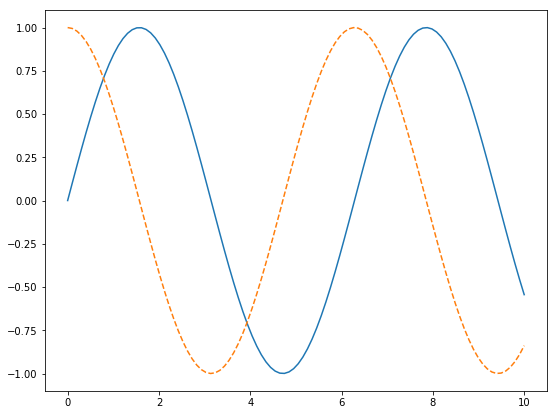

In [47]:
import numpy as np # gebruiken we om wat data te genereren
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7) # default afmeting van plots vergroten

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

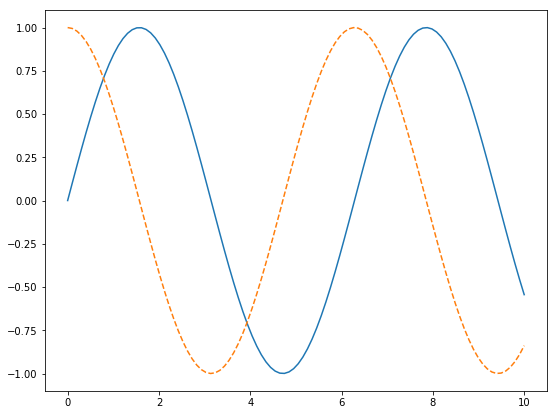

In [17]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
plt.show()

### opslaan van figuren
Opslaan kan je met het ``savefig()`` command. Hieronder sla je bovenstaand gecreeerde figuur op als PNG figuur.

In [18]:
fig.savefig('myplot.png')

### twee interfaces
Een mogelijk verwarrende feature van ``matplotlib`` is dat het twee interfaces ondersteund, een meer MATLAB-style state-based interface, en een meer kractigere object-georienteerde interface. Hieronder probeer ik het verschil tussen de twee interfaces snel te laten zien.

__MATLAB-style interface__  
``matplotlib`` is eigenlijk geschreven als een alternatief voor MATLAB gebruikers in python. Daarom heeft het veel een vergelijkbare syntax. MATLAB-style tools zitten in de pyplot (``plt``) interface. Hieronder een stukje code die deze stijl beschrijft, zou voor MATLAB gebruikers en bekend uit moeten zien.

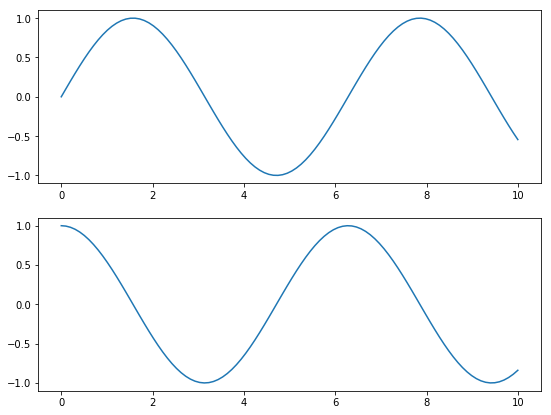

In [19]:
plt.figure() # creeer een figuur

# creeer het eerste paneel en vul
plt.subplot(2, 1, 1) # (rows, columns, paneel nr.)
plt.plot(x, np.sin(x))

# creer het tweede paneel en vul
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

__object georienteerde interface__  
De object georienteerde interface is voor de complexere situaties en voor nog meer controle over je figuren. Zie hieronder het voorbeeld om bovenstaande figuur te reproduceren.

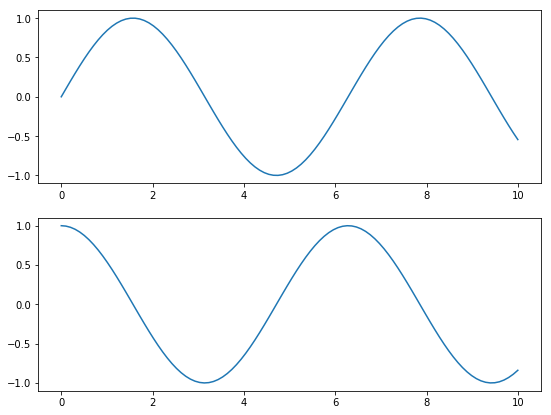

In [20]:
# eerst creeeren we een grid voor de plots
# ax is een list/array van twee Axes objecten
fig, ax = plt.subplots(2)

# call plot() method op het juiste object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

<a id='line'></a>
[terug naar index](#index)
## line plots introductie
Laten we eerst kijken hoe we een simpele functie $y = f(x)$ kunnen plotten. Laten we weer de sinus van hierboven gebruiken.

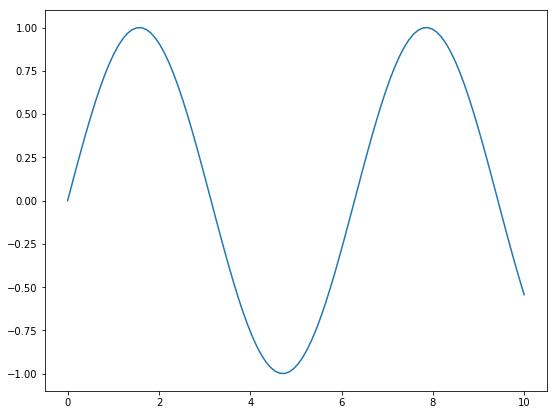

In [21]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x));

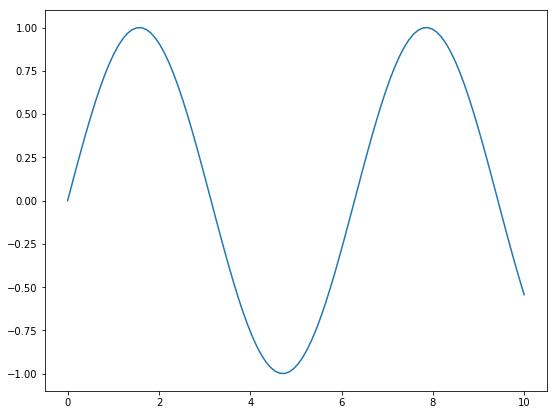

In [22]:
plt.plot(x, np.sin(x)); # of het in dit geval simpelere alternatief

Als je meerdere lijnen wil maken in dezelfde figuur kan je de ``plot`` functie gewoon meerdere keren gebruiken.

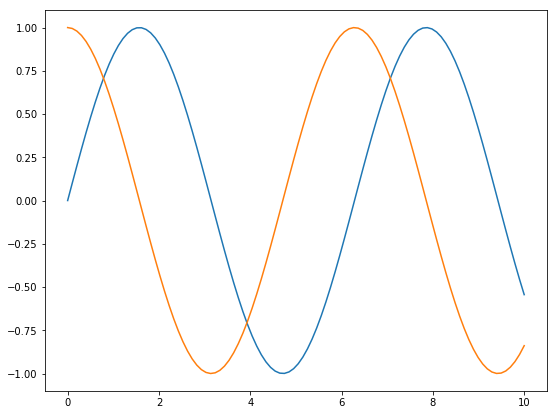

In [23]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### plots aanpassen, kleur & stijl
Als je de kleur wil aanpassen van de lijn, kan je in ``plt.plot()`` het keyword ``color`` gebruiken. Zie hieronder wat voorbeelden, je kan verschillende manieren van kleur definities gebruiken.

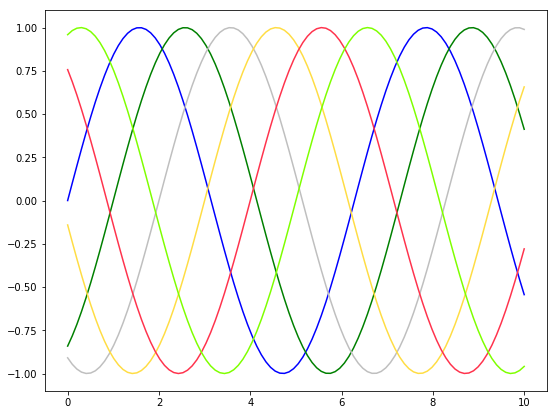

In [24]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Als geen kleur is ingesteld, pakt ``matplotlib`` standaard verschillende kleuren uit een colorcycle. (zoals je hierboven zag is de eerste blauwig, daarna oranje etc. zie hieronder voor de rest)

Net als de kleur, kan je de lijnstijl aanpassen met het ``linestyle`` keyword. Zie hieronder weer wat voorbeelden.

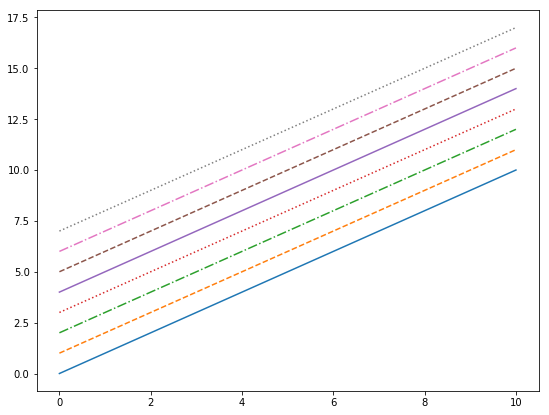

In [25]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Je kan ook kleur en style combinieren in een enkel ``non-keyword`` argument in ``plt.plot()``, zie hieronder wat voorbeelden.

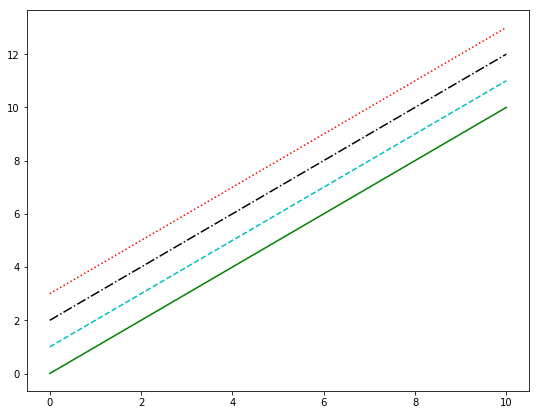

In [26]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

### as limieten
``matplotlib`` geeft default meestal aardige assen terug, je kan ze nog verder aanpassen mocht je dat willen. Het simpelste is om de as limieten aan te passen, met ``plt.xlim()`` of ``plt.ylim()``.

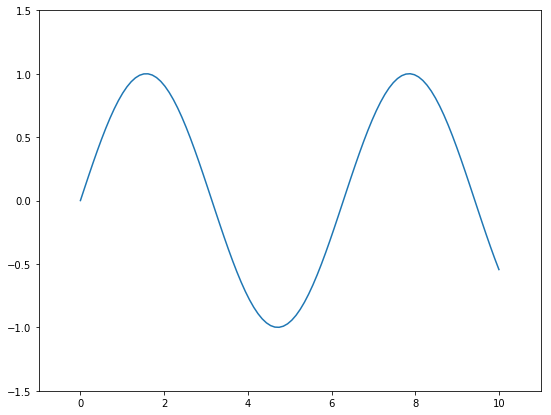

In [27]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

### labelen van plots

Als laatste van de lineplots kijken we nog naar het labelen van plots, denk aan de titel (``plt.title()``), as labels (``plt.xlabel()``, ``plt.ylabel()``), en simpele legendas (``plt.legend()``). Zie hieronder twee voorbeeld.

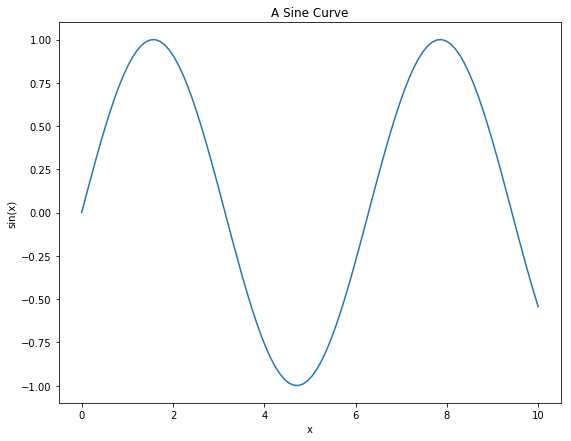

In [28]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

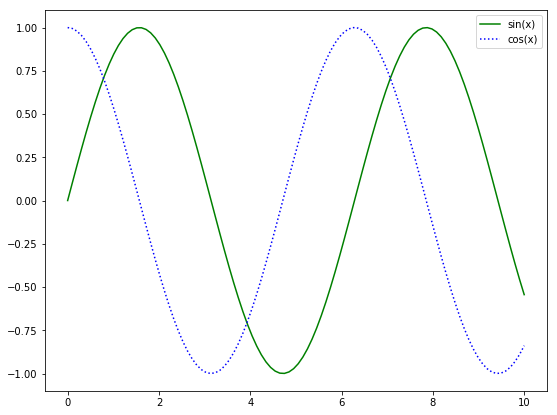

In [29]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.legend();

We hebben nu vooral de MATLAB style gebruikt, meestal vertaald de MATLAB style (``plt``) direct naar de object georienteerde style (``ax``) (bijv. ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``). Maar vooral voor het aanpassen van limieten, labels en titels zijn de functies net aangepast zie hieronder de verschillen.

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

Met ``ax.set()`` methode kan je alles in een keer zetten.

<a id='ex1'></a>
[terug naar index](#index)

# exercise 1
Laad het ``data/lobith.csv`` bestand in met ``pandas``. Haal de volgende kolommen binnen, ``['WAARNEMINGDATUM', 'WAARNEMINGTIJD', 'NUMERIEKEWAARDE']``. Het is een Nederlands bestand, dus denk aan het scheidingsteken en decimaal. Zet de datum/tijd kolommen om naar een ``DateTimeIndex``. Gebruik ``dayfirst=True``, om het Nederlands formaat met dag eerst in datum in te lezen. Omdat het best veel data is en de kolom een uniforme indeling heeft, gebruikt ``infer_datetime_format=True``, hiermee neem je aan dat de datumindeling gelijk is in de kolom. Het ``NaN`` getal bij RWS zit ergens in de 0.99E38, selecteer enkel de logische waarden (debiet bij Lobith is in de afgelopen jaren zeker niet meer dan 20.000 m3/s geweest).

In [132]:
lb = pd.read_csv('data/lobith.csv', usecols=['WAARNEMINGDATUM', 'WAARNEMINGTIJD', 'NUMERIEKEWAARDE'], sep=';', decimal=',',
                 parse_dates=[['WAARNEMINGDATUM', 'WAARNEMINGTIJD']], dayfirst=True, infer_datetime_format=True, 
                index_col=[0])
lb.head()

,NUMERIEKEWAARDE
WAARNEMINGDATUM_WAARNEMINGTIJD,
2000-01-01 00:00:00,6426.0
2000-01-01 01:00:00,6412.0
2000-01-01 02:00:00,6398.0
2000-01-01 03:00:00,6384.0
2000-01-01 04:00:00,6370.0


Maak een line plot van de debietreeks bij Lobith van 2017-2018. Voeg een maand gemiddelde reeks toe met een gestreepde lijn. Geef de plot asnamen, een titel en een legenda.

<a id='scatter'></a>
[terug naar index](#index)

## scatter
Een andere plot die je waarschijnlijk veel gebruikt is de ``scatter``. Lijkt erg op de ``line plot``, alleen nu zijn de punten niet verbonden met lijnen, de punten worden individueel weergegeven met een marker, zoals bijv. een cirkel, driehoek etc. 

### scatter met plt.plot
Je kan ook een scatter maken met de hierboven behandelde ``plt.plot()``.

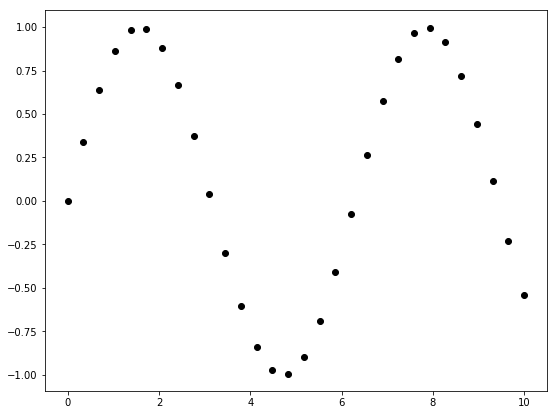

In [30]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

Het derde argument in de functie is het symbool gebruikt in de plot. Net als je ``'-'`` en ``'--'`` kan gebruiken voor de ``linestyle`` heeft de ``marker`` ook een aantal short string codes, zie hieronder, de meeste zijn redelijk intuitief.

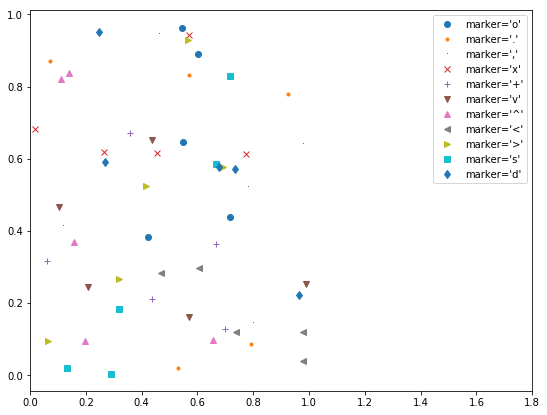

In [31]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Je kan de short codes voor ``linestyle`` ``marker`` en ``color`` ook combineren zie hieronder een voorbeeld.

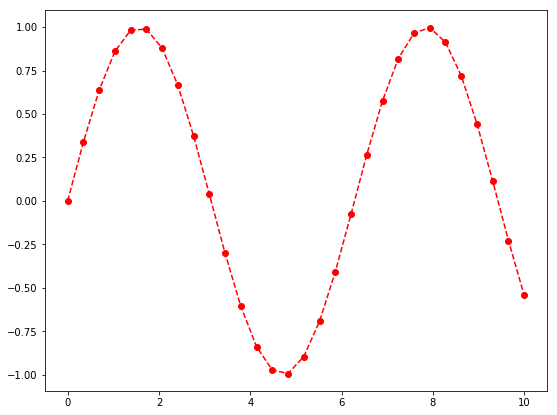

In [32]:
plt.plot(x, y, 'o--r');

### scatter plots met plt.scatter
Naast ``plt.plot``  kan je ook ``plt.scatter`` gebruiken, hier heb je iets meer scatter functies. Zie hieronder een standaardvoorbeeld. 

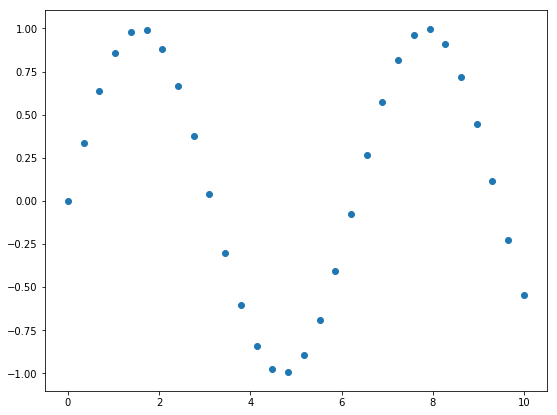

In [33]:
plt.scatter(x, y, marker='o');

Het grootste verschil tussen ``plot`` en ``scatter`` is dat je bij ``scatter`` elk punt apart kan stylen. Zie hieronder een voorbeeld.

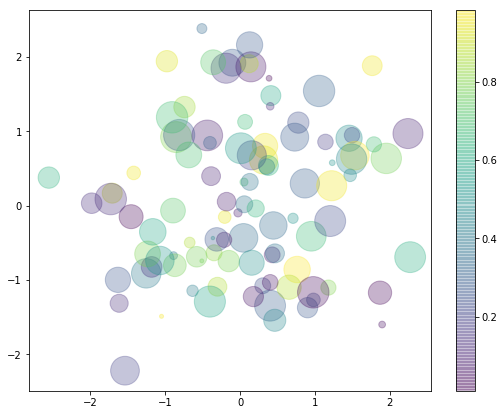

In [34]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Als je heel veel data hebt is ``plot`` een stuk sneller dan ``scatter``.

Lees ``data/sint_pieter.csv`` in. Deze heeft hetzelfde format als de file die je bij exercise 1 hebt ingeladen.

In [134]:
sp = pd.read_csv('data/sint_pieter.csv', usecols=['WAARNEMINGDATUM', 'WAARNEMINGTIJD', 'NUMERIEKEWAARDE'], sep=';', decimal=',',
                 parse_dates=[['WAARNEMINGDATUM', 'WAARNEMINGTIJD']], dayfirst=True, infer_datetime_format=True, 
                index_col=[0])
sp.head()

,NUMERIEKEWAARDE
WAARNEMINGDATUM_WAARNEMINGTIJD,
2000-01-01 00:00:00,977.0
2000-01-01 00:10:00,978.0
2000-01-01 00:20:00,977.6
2000-01-01 00:30:00,968.2
2000-01-01 00:40:00,968.8


Maak een scatter voor het jaar 2018 met op de X-as de afvoer van Lobith en op de Y-as de afvoer van Sint Pieter. Resample de data naar dagwaarden.

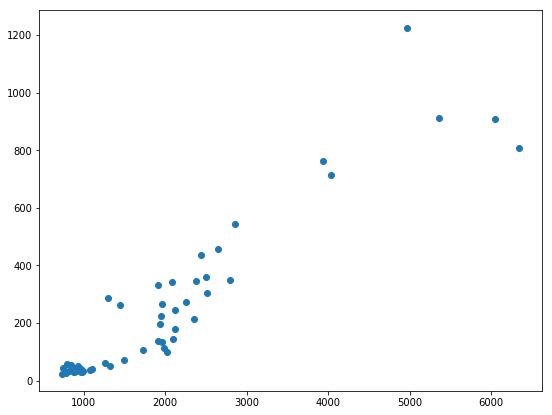

In [154]:
lb[lb>20000] = float('nan')
sp[sp>20000] = float('nan')
lb2018 = lb['2018'].resample('w').mean()
sp2018 = sp['2018'].resample('w').mean()
plt.scatter(lb2018.values, sp2018.values);

Kleur de scatter op maand (``df.index.month``) en pas de grootte aan op basis van de som van de afvoeren van de Rijn en de Maas. Je kan de ``cmap`` gebruiken, door een integer mee te geven krijg je een discrete verdeling van de kleuren. Geef de plot labels, titel en een legenda (colorbar?).

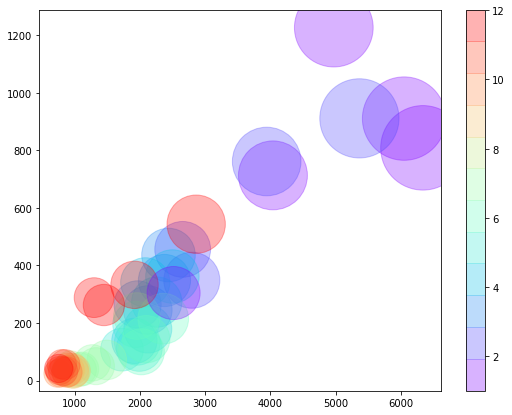

In [160]:
cmap = plt.cm.get_cmap('rainbow', 12)

colors = lb2018.index.month
sizes = lb2018 + sp2018
plt.scatter(lb2018.NUMERIEKEWAARDE, sp2018.NUMERIEKEWAARDE, c=colors, cmap=cmap, s=sizes, alpha=0.3)
plt.colorbar()

<a id='contour'></a>
[terug naar index](#index)
## contourplots
Met een contour kan je 3d data in een 2d vlak laten zien. Er zijn in ``matplotlib`` meerder functies die hiervoor kan gebruiken, hier behandelen we:
- ``plt.contour`` voor contour plots (enkel lijnen);
- ``plt.contourf`` voor gevulde contour plots. 
  
We gaan de verschillende methodes aan het werk zien op een 3d functie; $z = f(x, y)$.

In [35]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Een contour kan je maken met ``plt.contour`` heeft ten minste drie argumenten nodig, een grid x-waardes, een grid y-waardes en een grid z-waardes. De x en y waardes geven de positie weer, de z waardes de waarde van de contour. Hieronder een de line-only contour.

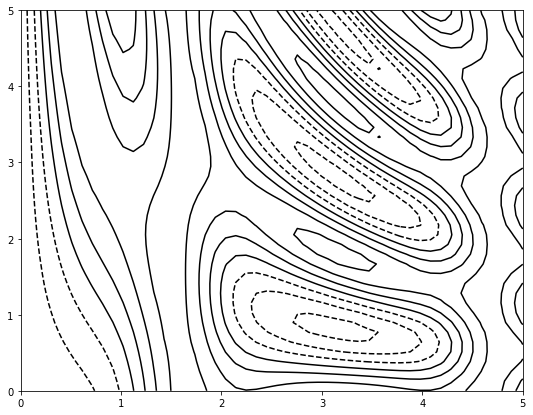

In [36]:
plt.contour(X, Y, Z, colors='black');

Default wordt een kleur gebruikt, negatieve waardes worden weergegeven door een stippellijn. We kunnen de lijnen ook kleurcoderen door een ``cmap``  mee te geven. We moeten ook het aantal gelijke intervallen in de data meegeven, hieronder gebruiken we 20.

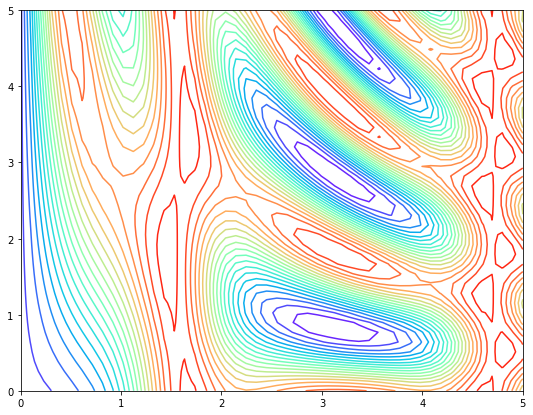

In [37]:
plt.contour(X, Y, Z, 20, cmap='rainbow');

Om te kijken welke ``cmaps``  beschikbaar zijn kunnen we ``plt.cm.<TAB>``  gebruiken. Pas de ``cmap`` hierboven maar aan.

In [38]:
plt.cm.

SyntaxError: invalid syntax (<ipython-input-38-c37929dd60af>, line 1)

Om de gaten tussen de lijnen op te vullen kunnen we ``plt.contourf`` gebruiken. Met ``plt.colorbar``  wordt er een extra as meegegeven met daarin de kleur, data relatie, een legenda.

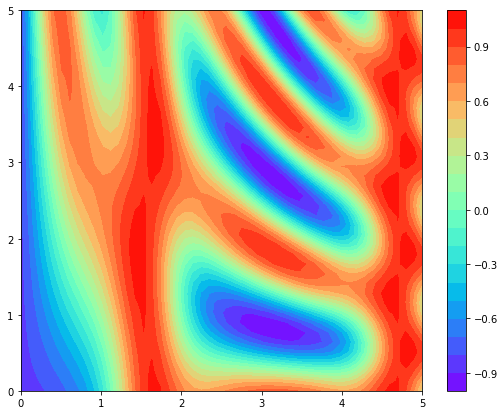

In [39]:
plt.contourf(X, Y, Z, 20, cmap='rainbow')
plt.colorbar();

<a id='ex3'></a>
[terug naar index](#index)

# exercise 3
Maak een gevulde contourplot van het ingeladen AHN3 raster, voeg een colorbar toe.

In [169]:
import gdal
import numpy as np
gtif = gdal.Open('data/AHN3.tif')
array = gtif.ReadAsArray().astype(float)
array[array == 0] = np.nan

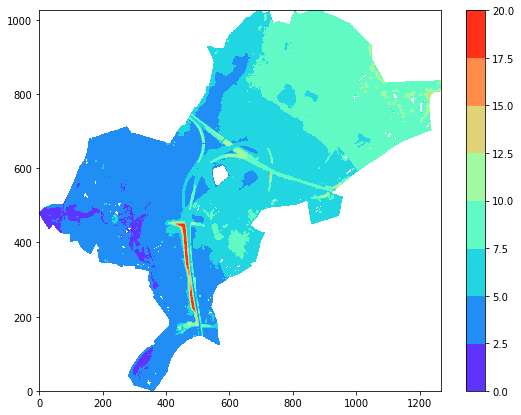

In [179]:
cf = plt.contourf(array, cmap='rainbow')
plt.colorbar(cf)

<a id='hist'></a>
[terug naar index](#index)

## histogram
Een histogram wordt vaak gebruikt om simpel een dataset (oa verdeling, spreiding etc.) beter te begrijpen. Met ``plt.hist`` kunnen we een histogram maken. Zie hieronder een voorbeeld.

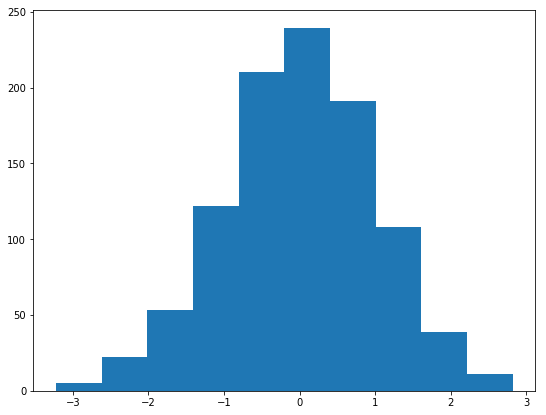

In [40]:
data = np.random.randn(1000)
plt.hist(data);

De ``hist``  functie heeft veel methodes om de histogram te stijlen en de berekeningen aan te passen zie hieronder een iets complexer voorbeeld.

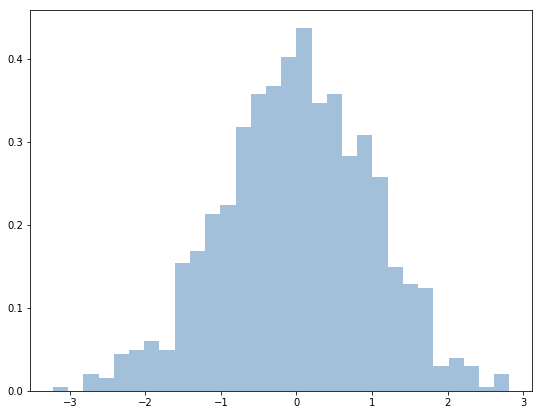

In [41]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

Met ``plt.hist?`` kan je weer de documentatie te openen voor meer informatie. Vooral de combinatie ``stepfileed`` met ``alpha`` is handig om verschillende distributies van data te vergelijken. We gebruiken hier ook ``**kwargs`` om dezelfde settings naar alle plots mee te geven.

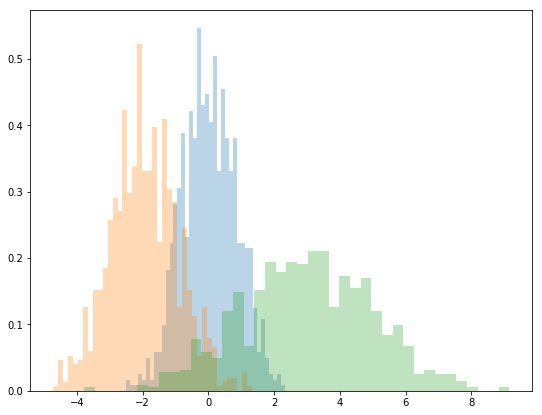

In [43]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

<a id='ex4'></a>
[terug naar index](#index)
# exercise 4
Maak een histogram van de Lobith (Rijn) en Sint Pieter (Maas) debietreeks

<a id='pd'></a>
[terug naar index](#index)
# pandas
``pandas`` heeft ook ``matplotlib`` geintegreerd. Je kan data direct plotten van een ``DataFrame`` met de ``plot`` methode.

In [57]:
import requests
import pandas as pd
from io import StringIO

params = {'stns': 834, 'start': '19000101'} # station Chaam vanaf 1900
r = requests.get('http://projects.knmi.nl/klimatologie/monv/reeksen/getdata_rr.cgi', params=params)
df = pd.read_csv(StringIO(r.text), skiprows=23, parse_dates=['YYYYMMDD'], 
                 index_col='YYYYMMDD', skipinitialspace=True) # lees data in index datetime
df[df.SX > 996] = float('nan') # 997 + geeft iets aan over liggende sneeuw
df = df.drop(columns=['STN', 'Unnamed: 4']) # drop onnodige kolommen
df = df.copy()/10
df.head()

,RD,SX
YYYYMMDD,,
1951-01-01,2.5,NaN
1951-01-02,2.0,NaN
1951-01-03,7.0,NaN
1951-01-04,0.0,NaN
1951-01-05,1.4,NaN


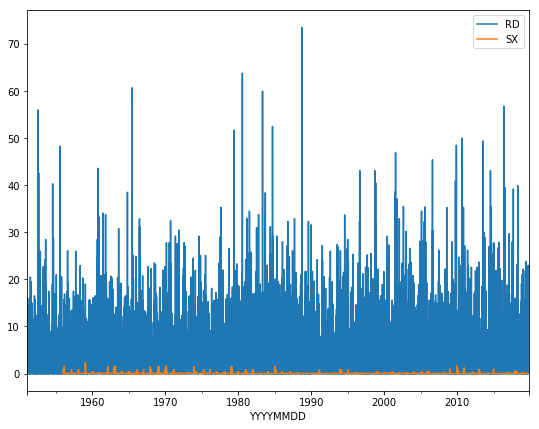

In [58]:
df.plot(); # default plot is een lineplot, plot hele dataframe

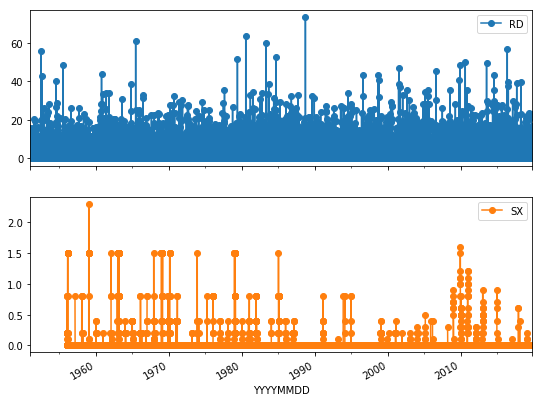

In [84]:
df.plot(subplots=True, style='-o'); # elke series krijgt een subplot, met style kan je de linestyle en marker aanpassen

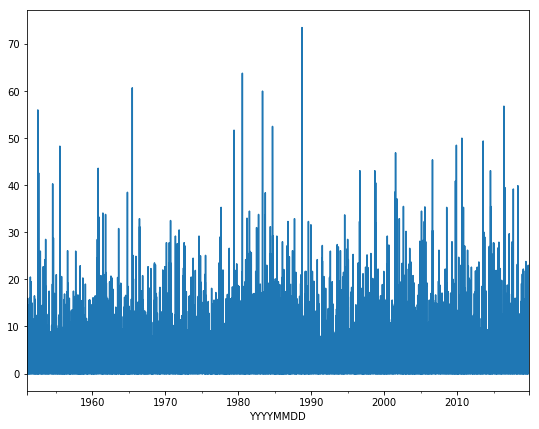

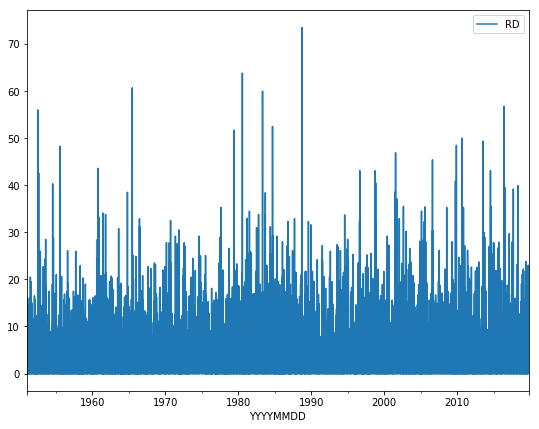

In [78]:
df.RD.plot() # of plotten van een enkele Series
df.plot(y='RD'); # dit werkt ook

Met het argument ``kind`` kan je verschillende plottypes, hieronder enkele:
- ``line``;
- ``scatter``;
- ``bar``;
- ``barh``, horizontale barplot;
- ``hist``, histogram;
- ``box``, boxplot;
- ``pie``.

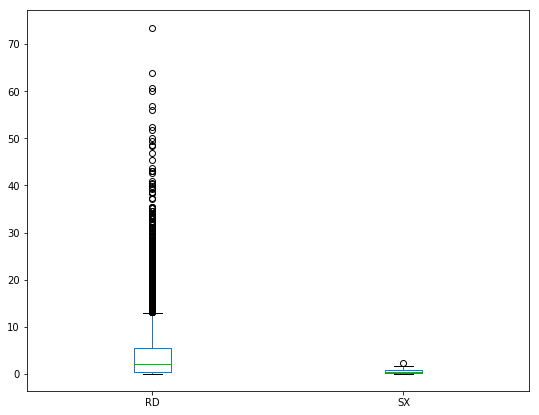

In [60]:
df[df>0].plot(kind='box');

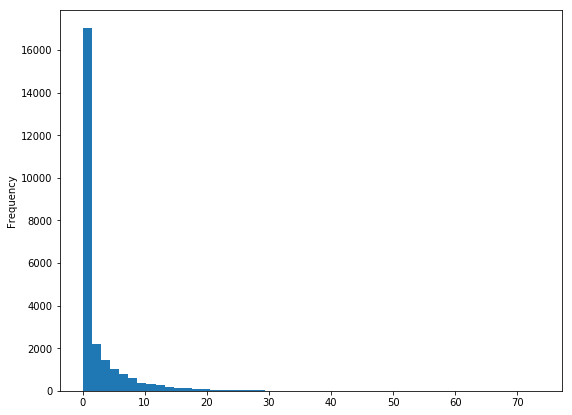

In [75]:
df.RD.plot(kind='hist', bins=50);

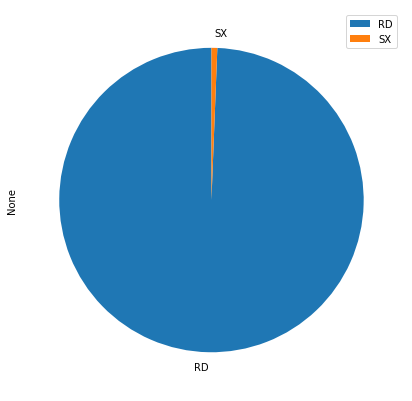

In [70]:
df.sum(axis=0).plot(kind='pie', legend=True, startangle=90);

<a id='ex5'></a>
[terug naar index](#index)

# exercise 5
Maak drie plots met de meetreeksen van Lobith en Sint Pieter, deze zitten al in een ``DataFrame``.

<a id='gpd'></a>
[terug naar index](#index)

# geopandas
``geopandas`` kent ook een ``.plot`` methode, deze geeft de ``geometry`` in x, y weer, eigenlijk een soort ``contour`` plot.

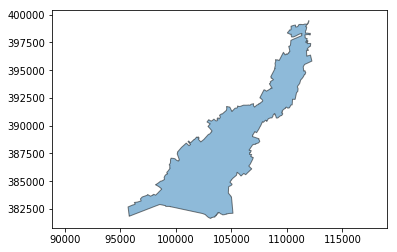

In [27]:
import geopandas as gpd

gdf = gpd.read_file('data/krwaaofweerijs.shp')
ax = gdf.plot(alpha=0.5, edgecolor='k')
ax.axis('equal'); # x-y afstanden gelijk zetten

In [18]:
import contextily as ctx
gdf = gdf.to_crs(epsg=3857)

ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

ModuleNotFoundError: No module named 'contextily'

<a id='sns'></a>
[terug naar index](#index)

# seaborn
``seaborn`` bevat een high-level functies voor veel voorkomende plots en werkt goed samen met pandas. Neem een keer een kijkje in de [gallery van seaborn](https://seaborn.pydata.org/examples/index.html). Hieronder een paar voorbeelden met data de standaard ``iris`` dataset van seaborn.

``pairplot`` geeft een overzicht van een ``DataFrame``.

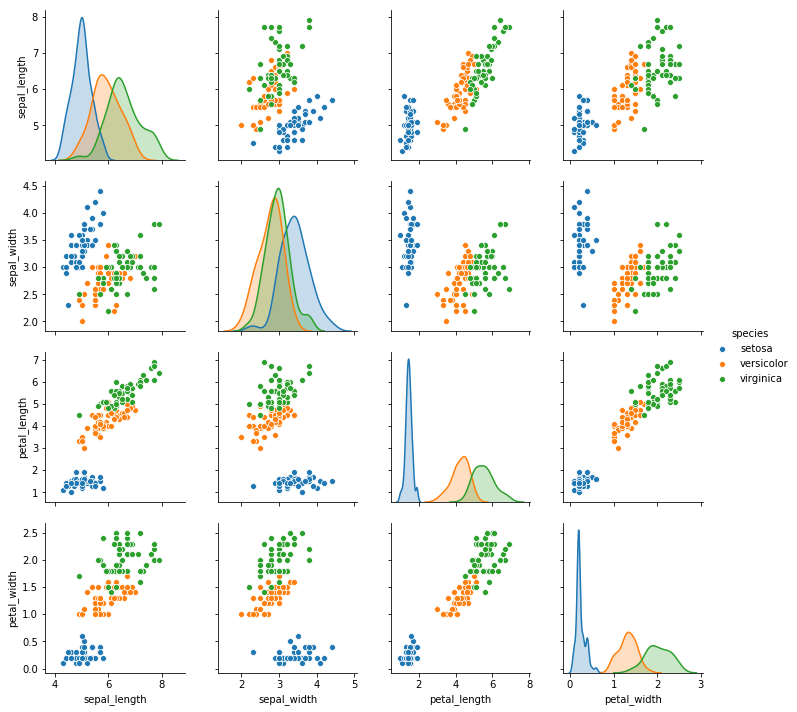

In [3]:
import seaborn as sns # weer conventie om sns te gebruiken

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species");

Hieronder twee ``kdeplots`` fit een verdeling en plot deze.

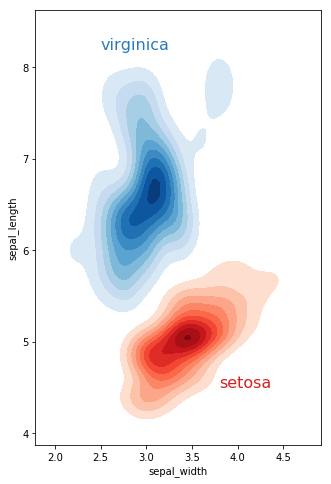

In [7]:
# Subset the iris dataset by species
setosa = df.query("species == 'setosa'")
virginica = df.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red);

Je kan ook met ``heatmap`` snel een ``heatmap`` maken van bijv. de correlatie tussen verschillende kolommen. Hieronder maken we een ``heatmap`` voor alle variabelen gemeten door KNMI station Gilze Rijen.

In [12]:
from io import StringIO
import pandas as pd
import requests

url_dag = 'http://projects.knmi.nl/klimatologie/daggegevens/getdata_dag.cgi'
params = {'start': '20180101', 'stns': '350'}

r = requests.get(url_dag, params=params)
columnnames = [column.strip() for column in StringIO(r.text).read().split("#")[-2].split(',')] # split op comment #, pak de
# een-na-laatste dit zijn de kolomnamen, split weer met komma, en strip() de kolomnamen van spaties en /r/n
df = pd.read_csv(StringIO(r.text), comment='#', sep=',', names=columnnames, parse_dates=[1], index_col=[1])
df.head()

,STN,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,...,VVN,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH
YYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2018-01-01,350,218,41,49,80,1,20,16,180,2,...,56,17,75,5,7,85,96,17,70,1
2018-01-02,350,217,45,54,80,19,30,1,140,19,...,27,19,70,5,8,88,95,22,80,12
2018-01-03,350,250,85,89,120,12,60,24,240,12,...,56,1,75,7,8,71,94,1,62,8
2018-01-04,350,233,51,56,100,20,30,7,210,21,...,28,13,80,20,7,82,96,12,65,20
2018-01-05,350,213,37,40,60,3,20,6,160,5,...,56,6,75,1,6,87,96,7,74,1


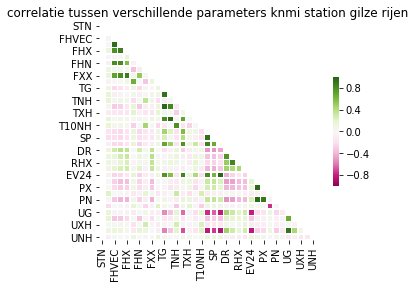

In [13]:
import numpy as np
import seaborn as sns

corr = df.corr() # correlatie matrix

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # masker voor de bovenste driehoek

plt.title('correlatie tussen verschillende parameters knmi station gilze rijen')
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='PiYG', square=True, linewidth=.5, cbar_kws={'shrink': .5});